# Understanding Polynomials with NumPy (using the `numpy.polynomial.polynomial` module)

https://numpy.org/devdocs/reference/routines.polynomials.classes

The `numpy.polynomial.polynomial` module offers an alternative and often more robust way to handle polynomial operations, especially for higher-degree polynomials or when dealing with numerical stability issues. It uses a different representation for polynomials internally, which can sometimes lead to better results.

While `numpy.poly1d` is excellent for general-purpose polynomial handling, `numpy.polynomial.polynomial` (and other submodules like `numpy.polynomial.chebyshev` for Chebyshev polynomials) are designed for more rigorous numerical analysis. The key difference lies in how coefficients are stored: `numpy.polynomial.polynomial` stores coefficients in *ascending* order of power, meaning the coefficient of $x^0$ comes first, then $x^1$, and so on.

## 1. Representing Polynomials: `numpy.polynomial.polynomial.Polynomial`

The `Polynomial` class in `numpy.polynomial.polynomial` allows you to create polynomial objects. Unlike `numpy.poly1d`, the coefficients are listed in *ascending* order of power.

For example, the polynomial $P(x) = 3x^2 + 2x - 1$ would be represented by the coefficients `[-1, 2, 3]`.

### Example

Let's define the polynomial $P(x) = 3x^2 + 2x - 1$.

In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly

# Define the polynomial P(x) = 3x^2 + 2x - 1
# Coefficients are in ascending order: [constant, x^1, x^2, ...]
P = poly.Polynomial([-1, 2, 3])

print("\nOur polynomial P(x):\n", P)

# Print the order of the polynomial
print("\nThe order of polynomial P(x):", P.degree())


Our polynomial P(x):
 -1.0 + 2.0·x + 3.0·x²

The order of polynomial P(x): 2


## 2. Evaluating Polynomials: `polyval`

Similar to `poly1d`, `Polynomial` objects can be called directly like a function to evaluate the polynomial at specific points. The `polyval` function from `numpy.polynomial.polynomial` can also be used if you have the coefficients directly.

### Example

Let's evaluate our polynomial $P(x) = 3x^2 + 2x - 1$ at $x = 5$ and $x = -2$.

In [2]:
# Evaluate P(x) at x = 5
val_at_5 = P(5)
print(f"P(5) = {val_at_5}")

# Evaluate P(x) at x = -2
val_at_minus_2 = poly.polyval(-2, P.coef)
print(f"P(-2) = {val_at_minus_2}")

# Evaluate P(x) for an array of x values
x_values = np.array([0, 1, 2, 3])
P_at_x_values = P(x_values)
print(f"P(x) for x_values {x_values} is: {P_at_x_values}")

P(5) = 84.0
P(-2) = 7.0
P(x) for x_values [0 1 2 3] is: [-1.  4. 15. 32.]


## 3. Finding Roots of a Polynomial: `poly.polyroots`

The `poly.polyroots` function in this module finds the roots of a polynomial given its coefficients. It's similar to `numpy.roots` but designed to work with the ascending order coefficient convention of the `numpy.polynomial` module.

### Example

Let's find the roots of another polynomial $Q(x) = x^3 - 6x^2 + 11x - 6$.

In [3]:
# Let's define another polynomial
# Q(x) = x^3 - 6x^2 + 11x - 6
Q = poly.Polynomial([-6, 11, -6, 1])
print("\nOur polynomial Q(x):\n", Q)

roots_Q = poly.polyroots(Q.coef)
print(f"The roots of Q(x) are (method 1): {roots_Q}")

roots_Q = Q.roots()
print(f"The roots of Q(x) are (method 2): {roots_Q}")


Our polynomial Q(x):
 -6.0 + 11.0·x - 6.0·x² + 1.0·x³
The roots of Q(x) are (method 1): [1. 2. 3.]
The roots of Q(x) are (method 2): [1. 2. 3.]


## 4. Constructing a Polynomial from its Roots: `poly.polyfromroots`

`poly.polyfromroots` is the counterpart to `poly.polyroots`. Given a sequence of roots, it returns the coefficients of the polynomial that has those roots, adhering to the ascending order convention.

### Example

Let's reconstruct the polynomial $Q(x)$ using its roots, which we found to be approximately `[1., 2., 3.]`.

In [4]:
# Reconstruct polynomial Q(x) from its roots
reconstructed_Q_coeffs = poly.polyfromroots(roots_Q)
print(f"Coefficients of Q(x) reconstructed from roots (method 1): {reconstructed_Q_coeffs}")

reconstructed_Q_coeffs = poly.Polynomial.fromroots(roots_Q)
print(f"Coefficients of Q(x) reconstructed from roots (method 2): {reconstructed_Q_coeffs}")

# We can then create a Polynomial object from these coefficients
reconstructed_Q = poly.Polynomial(reconstructed_Q_coeffs)
print("\nReconstructed polynomial Q(x):\n", reconstructed_Q)

Coefficients of Q(x) reconstructed from roots (method 1): [-6. 11. -6.  1.]
Coefficients of Q(x) reconstructed from roots (method 2): -6.0 + 11.0·x - 6.0·x² + 1.0·x³

Reconstructed polynomial Q(x):
 -6.0 + 11.0·x - 6.0·x² + 1.0·x³


## 5. Polynomial Fitting: `poly.polyfit`

`poly.polyfit` is the equivalent of `numpy.polyfit` for this module. It finds the coefficients of a polynomial that best fits a given set of data points using a least-squares approach.

The function takes `x` coordinates, `y` coordinates, and the desired degree of the polynomial. It returns the coefficients in *ascending* order.

### Example

Suppose we have some experimental data and we want to fit a quadratic polynomial to it.

Coefficients of the fitted polynomial: [-6.78178639 13.48042043 -7.23026014  1.15706276]

Fitted polynomial Q_fit(x) (method 1):
 -6.78178639 + 13.48042043·x - 7.23026014·x² + 1.15706276·x³

Fitted polynomial Q_fit(x) (method 2):
 -6.78178639 + 13.48042043·x - 7.23026014·x² + 1.15706276·x³


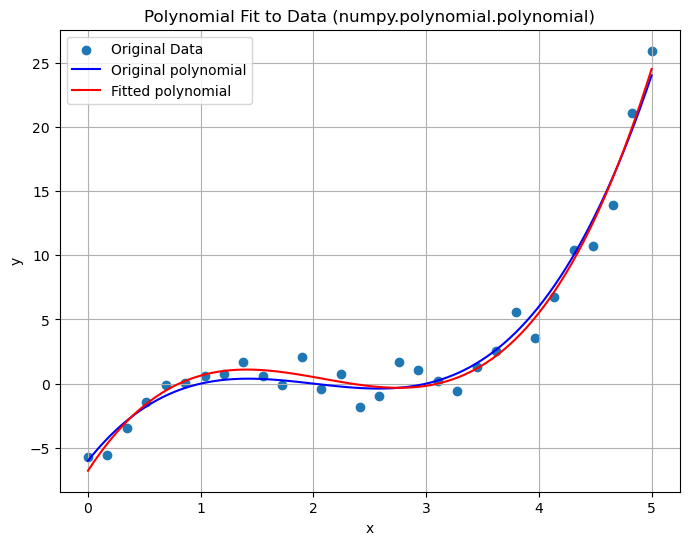

In [5]:
# Experimental data
n_data = 30
x_data = np.linspace(0, 5, n_data)
y_data = Q(x_data) + np.random.randn(n_data)

# Fit a 3rd degree polynomial to the data
# The result will be the coefficients [d, c, b, a] for ax^3 + bx^2 + cx + d
coeffs_fit = poly.polyfit(x_data, y_data, 3)
print(f"Coefficients of the fitted polynomial: {coeffs_fit}")

# Create a Polynomial object from the fitted coefficients
Q_fit = poly.Polynomial(coeffs_fit)
print("\nFitted polynomial Q_fit(x) (method 1):\n", Q_fit)

Q_fit = poly.Polynomial.fit(x_data, y_data, 3).convert()
print("\nFitted polynomial Q_fit(x) (method 2):\n", Q_fit)

# Let's plot the original data and the fitted polynomial
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, label='Original Data')
x_plot = np.linspace(min(x_data), max(x_data), 100)
plt.plot(x_plot, Q(x_plot),     color='blue', label='Original polynomial')
plt.plot(x_plot, Q_fit(x_plot), color='red',  label='Fitted polynomial')
plt.title('Polynomial Fit to Data (numpy.polynomial.polynomial)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## 6. Polynomial Differentiation: `Polynomial.deriv` (or `poly.polyder`)

The `Polynomial` object has a `.deriv()` method for differentiation. Alternatively, `poly.polyder` can be used directly on the coefficient array.

If $P(x) = \sum_{i=0}^n a_i x^i$, then $\frac{dP}{dx} = \sum_{i=1}^n i a_i x^{i-1}$.

### Example

Let's find the first and second derivatives of our polynomial $P(x) = 3x^2 + 2x - 1$.

In [6]:
# Our original polynomial P(x)
print("Original P(x):\n", P)

# Using poly.polyder with coefficients directly
P_prime_coeffs = poly.polyder(P.coef, m=1)
P_prime_from_coeffs = poly.Polynomial(P_prime_coeffs)
print("\nFirst derivative P'(x):\n", P_prime_from_coeffs)

# First derivative of P(x) using .deriv()
P_prime = P.deriv(m=1) # m=1 for first derivative
print("\nFirst derivative P'(x) (using .deriv()):\n", P_prime)

# Second derivative of P(x)
P_double_prime = P.deriv(m=2) # m=2 for second derivative
print("\nSecond derivative P''(x) (using .deriv()):\n", P_double_prime)

Original P(x):
 -1.0 + 2.0·x + 3.0·x²

First derivative P'(x):
 2.0 + 6.0·x

First derivative P'(x) (using .deriv()):
 2.0 + 6.0·x

Second derivative P''(x) (using .deriv()):
 6.0


## 7. Polynomial Integration: `Polynomial.integ` (or `poly.polyint`)

The `Polynomial` object has an `.integ()` method for integration. `poly.polyint` can also be used directly on the coefficient array. You can specify the constant of integration.

If $P(x) = \sum_{i=0}^n a_i x^i$, then $\int P(x) dx = C + \sum_{i=0}^n \frac{a_i}{i+1} x^{i+1}$.

### Example

Let's find the indefinite integral of $P(x) = 3x^2 + 2x - 1$. We'll set the constant of integration to 10.

In [7]:
# Our original polynomial P(x)
print("Original P(x):\n", P)

# Using poly.polyint with coefficients directly
P_integral_coeffs = poly.polyint(P.coef, m=1, k=[10])
P_integral = poly.Polynomial(P_integral_coeffs)
print("\nIndefinite integral of P(x) (using poly.polyint, C=10):\n", P_integral)

# Let's verify by differentiating the integral
P_integral_prime = P_integral.deriv()
print("\nDerivative of the integral of P(x):\n", P_integral_prime) # This should be P(x)

# Indefinite integral of P(x) with integration constant C = 10
P_integral = P.integ(m=1, k=[10]) # m=1 for single integration, k=[10] for constant
print("\nIndefinite integral of P(x) (using .integ(), C=10):\n", P_integral)

Original P(x):
 -1.0 + 2.0·x + 3.0·x²

Indefinite integral of P(x) (using poly.polyint, C=10):
 10.0 - 1.0·x + 1.0·x² + 1.0·x³

Derivative of the integral of P(x):
 -1.0 + 2.0·x + 3.0·x²

Indefinite integral of P(x) (using .integ(), C=10):
 10.0 - 1.0·x + 1.0·x² + 1.0·x³


## 8. Polynomial Addition: `Polynomial` object addition (or `poly.polyadd`)

`Polynomial` objects can be added directly using the `+` operator. You can also use `poly.polyadd` for adding coefficient arrays.

### Example

Let $P_1(x) = 3x^2 + 2x - 1$ and $P_2(x) = x^3 - 4x + 5$.

In [8]:
# Define P1(x) and P2(x)
P1 = poly.Polynomial([-1, 2, 3])    # 3x^2 + 2x - 1
P2 = poly.Polynomial([5, -4, 0, 1]) # x^3 - 4x + 5

print("\nP1(x):\n", P1)
print("\nP2(x):\n", P2)

# Add the polynomials directly
P_sum = P1 + P2
print("\nSum of P1(x) and P2(x) (direct addition):\n", P_sum)

# Add using poly.polyadd on coefficients
P_sum_coeffs = poly.polyadd(P1, P2)
P_sum_from_coeffs = poly.Polynomial(P_sum_coeffs)
print("\nSum of P1(x) and P2(x) (using poly.polyadd):\n", P_sum_from_coeffs)


P1(x):
 -1.0 + 2.0·x + 3.0·x²

P2(x):
 5.0 - 4.0·x + 0.0·x² + 1.0·x³

Sum of P1(x) and P2(x) (direct addition):
 4.0 - 2.0·x + 3.0·x² + 1.0·x³

Sum of P1(x) and P2(x) (using poly.polyadd):
 4.0 - 2.0·x + 3.0·x² + 1.0·x³


## 9. Polynomial Subtraction: `Polynomial` object subtraction (or `poly.polysub`)

`Polynomial` objects can be subtracted directly using the `-` operator. `poly.polysub` is also available for coefficient arrays.

### Example

Let's subtract $P_2(x)$ from $P_1(x)$.

In [9]:
# P1(x) and P2(x) are defined above

# Subtract P2(x) from P1(x) directly
P_diff = P1 - P2
print("\nDifference P1(x) - P2(x):\n", P_diff)

# Subtract using poly.polysub on coefficients
P_diff_coeffs = poly.polysub(P1, P2)
P_diff_from_coeffs = poly.Polynomial(P_diff_coeffs)
print("\nDifference P1(x) - P2(x) (using poly.polysub):\n", P_diff_from_coeffs)


Difference P1(x) - P2(x):
 -6.0 + 6.0·x + 3.0·x² - 1.0·x³

Difference P1(x) - P2(x) (using poly.polysub):
 -6.0 + 6.0·x + 3.0·x² - 1.0·x³


## 10. Polynomial Multiplication: `Polynomial` object multiplication (or `poly.polymul`)

`Polynomial` objects can be multiplied directly using the `*` operator. `poly.polymul` is available for coefficient arrays.

### Example

Let's multiply $P_1(x) = 3x^2 + 2x - 1$ and $P_2(x) = x^3 - 4x + 5$.

In [10]:
# P1(x) and P2(x) are defined above

# Multiply using poly.polymul on coefficients
P_prod_coeffs = poly.polymul(P1, P2)
P_prod = poly.Polynomial(P_prod_coeffs)
print("\nProduct of P1(x) and P2(x) (using poly.polymul):\n", P_prod)

# Multiply the polynomials directly
P_prod = P1 * P2
print("\nProduct of P1(x) and P2(x) (direct multiplication):\n", P_prod)


Product of P1(x) and P2(x) (using poly.polymul):
 -5.0 + 14.0·x + 7.0·x² - 13.0·x³ + 2.0·x⁴ + 3.0·x⁵

Product of P1(x) and P2(x) (direct multiplication):
 -5.0 + 14.0·x + 7.0·x² - 13.0·x³ + 2.0·x⁴ + 3.0·x⁵


## 11. Polynomial Division: `poly.polydiv`

Polynomial division in `numpy.polynomial.polynomial` is handled by `poly.polydiv`. It returns the coefficients of the quotient and the remainder, similar to `numpy.polydiv`.

### Example

Let $Q(x) = x^3 - 6x^2 + 11x - 6$, $P_2(x) = 3x^2 - 2$, and $R(x) = 3x - 1$. Let us perform the multiplication $P_1(x) = Q(x)P_2(x) + R(x)$, and then retrieve $Q(x)$ and $R(x)$.

In [11]:
# Define P1_div(x) and P2_div(x)
Q  = poly.Polynomial(np.array([1, -6, 11, -6]))
P2 = poly.Polynomial(np.array([3, 0, -2]))
R  = poly.Polynomial(np.array([3, -1]))

P1 = Q*P2 + R
print("P1(x):\n", P1)

# Divide P1_div(x) by P2_div(x)
Q_est_coeffs, R_est_coeffs = poly.polydiv(P1.coef, P2.coef)
Q_est = poly.Polynomial(Q_est_coeffs)
R_est = poly.Polynomial(R_est_coeffs)

print("\nQuotient  Q(x):\n", Q_est)
print("\nRemainder R(x):\n", R_est)

# Alternatively, you can directly divide poly1d objects
Q_est = P1//P2
R_est = P1%P2
# Q_est, R_est = divmod(P1, P2) is also valid
print("\nQuotient  Q(x) (direct division):\n", Q_est)
print("\nRemainder R(x) (direct division):\n", R_est)

P1(x):
 6.0 - 19.0·x + 31.0·x² - 6.0·x³ - 22.0·x⁴ + 12.0·x⁵

Quotient  Q(x):
 1.0 - 6.0·x + 11.0·x² - 6.0·x³

Remainder R(x):
 3.0 - 1.0·x

Quotient  Q(x) (direct division):
 1.0 - 6.0·x + 11.0·x² - 6.0·x³

Remainder R(x) (direct division):
 3.0 - 1.0·x
